In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import random

In [2]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = X w + b + noise."""
    X = torch.zeros(size=(num_examples, len(w))).normal_()
    y = torch.matmul(X, w) + b
    y += torch.zeros(size=y.shape).normal_(std=0.01) #To make our problem easy, we will set its standard deviation to  0.01 . The following code generates our synthetic dataset:
    return X, y

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

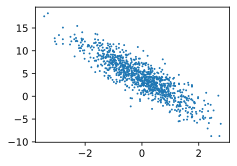

In [3]:
d2l.set_figsize((3.5, 2.5))
d2l.plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [4]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.9416, -1.7813]) 
label: tensor(6.3770)


In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)]) # ?最后一次可能不足一个batch.
        # tensor(floattensor):32-bit;Longtensor:64-bit.
        yield features[j], labels[j]

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.8108,  0.4623],
        [-1.9910, -0.8783],
        [ 0.6564,  0.6211],
        [ 0.7864, -1.5790],
        [-1.2280,  0.8764],
        [ 0.2113,  0.6807],
        [ 0.0650,  0.1869],
        [ 0.2030,  1.6318],
        [-0.4829,  0.1785],
        [ 1.0573, -0.6666]]) 
 tensor([ 4.2518,  3.2068,  3.4072, 11.1411, -1.2355,  2.3000,  3.7021, -0.9236,
         2.6200,  8.5684])


In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', )
    break

tensor([[ 1.5387, -0.5438],
        [-0.6032,  1.1803],
        [ 0.7339,  0.5321],
        [ 0.5057, -2.1168],
        [-0.0738, -0.1100],
        [ 1.4760,  0.8636],
        [-0.1767,  0.8116],
        [-0.0734,  0.2437],
        [ 0.8540, -0.8644],
        [ 0.8099,  0.1611]]) 



import torch.utils.data as Data
batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

for X, y in data_iter:
    print(X, y)
    break
# https://zhuanlan.zhihu.com/p/142947533

In [8]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [9]:
# Defining the Model
def linreg(X, w, b):  #@save
    return torch.matmul(X, w) + b

In [10]:
def squared_loss(y_hat, y):  #@save
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 # ?

In [11]:
def sgd(params, lr, batch_size):  #@save
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

In [12]:
lr = 0.03  # Learning rate
num_epochs = 3  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all
    # the examples in the training data set are used once in one epoch
    # iteration. The features and tags of mini-batch examples are given by X
    # and y respectively
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.mean().backward()  # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean())}')

epoch 1, loss 9.168006896972656
epoch 2, loss 4.958643913269043
epoch 3, loss 2.687278985977173


In [14]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w tensor([ 0.9171, -1.2593], grad_fn=<SubBackward0>)
Error in estimating b tensor([1.6990], grad_fn=<RsubBackward1>)


synthesized the data ourselves

Fortunately, even on difficult optimization problems, stochastic gradient descent can often find remarkably good solutions, owing partly to the fact that, for deep networks, there exist many configurations of the parameters that lead to accurate prediction.

In [15]:
w = torch.zeros(size=(2,1), requires_grad=True)

In [16]:
lr = 0.03  # Learning rate
num_epochs = 3  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all
    # the examples in the training data set are used once in one epoch
    # iteration. The features and tags of mini-batch examples are given by X
    # and y respectively
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.mean().backward()  # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean())}')

epoch 1, loss 5.108656883239746
epoch 2, loss 2.7467586994171143
epoch 3, loss 1.4789618253707886


In [17]:
w

tensor([[ 1.1281],
        [-2.1105]], requires_grad=True)

In [18]:
w = torch.zeros(size=(2,1), requires_grad=True)
w

tensor([[0.],
        [0.]], requires_grad=True)

In [19]:
lr = 0.03  # Learning rate
num_epochs = 3  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all
    # the examples in the training data set are used once in one epoch
    # iteration. The features and tags of mini-batch examples are given by X
    # and y respectively
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.mean().backward()  # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean())}')

epoch 1, loss 4.442716598510742
epoch 2, loss 2.3868186473846436
epoch 3, loss 1.2835431098937988


In [20]:
w

tensor([[ 1.1457],
        [-2.0979]], requires_grad=True)

Now, the reason we don't initialize the weights to zero is that the learning rate (eta) only has an effect on the classification outcome if the weights are initialized to non-zero values. If all the weights are initialized to zero, the learning rate parameter eta affects only the scale of the weight vector, not the direction.